In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hca
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster
from pylab import *

%matplotlib inline

In [14]:
meteorites = pd.read_csv("data/results/meteorites_unweighted.csv", index_col=0)
meteorites = meteorites.drop(columns=["id","year","recclass", "weights", 'lvl3', 'lvl4'])
meteorites.head()

,mass,fell_found,latitude,longitude,group,chondrite,type,lc_sample
1,21.0,Fell,50.77500,6.08333,L,Chondrite,Stony,11
2,720.0,Fell,56.18333,10.23333,H,Chondrite,Stony,1
3,331.0,Found,26.80000,-105.41667,H,Chondrite,Stony,2
4,21100.0,Found,36.30000,-104.28333,H,Chondrite,Stony,13
5,107000.0,Fell,54.21667,-113.00000,EH,Chondrite,Stony,1


In [15]:
#dummy variables

meteorites_dummy = pd.get_dummies(meteorites)
meteorites_dummy.head()

,mass,latitude,longitude,lc_sample,fell_found_Fell,fell_found_Found,group_Acapulcoite,group_Achondrite,group_Angrite,group_Aubrite,...,group_Stony,group_Ungrouped,group_Unknown,group_Ureilite,group_Winonaite,chondrite_Achondrite,chondrite_Chondrite,type_Iron,type_Stony,type_Stony-Iron
1,21.0,50.77500,6.08333,11,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,720.0,56.18333,10.23333,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,331.0,26.80000,-105.41667,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,21100.0,36.30000,-104.28333,13,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,107000.0,54.21667,-113.00000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [16]:
stscaler = StandardScaler()
meteorite_norm = stscaler.fit_transform(meteorites_dummy)

In [17]:
link_matrix=hca.linkage(meteorite_norm,metric='euclidean',method='ward')

Text(0.5, 0.9, 'Dendrogram (center, euclidean, ward)')

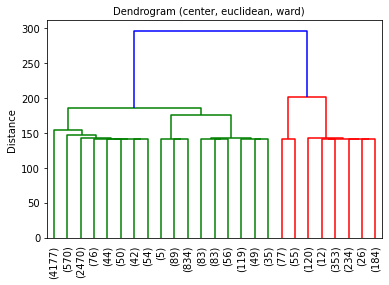

In [18]:
plt=hca.dendrogram(link_matrix,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)

Text(0, 0.5, 'Distance')

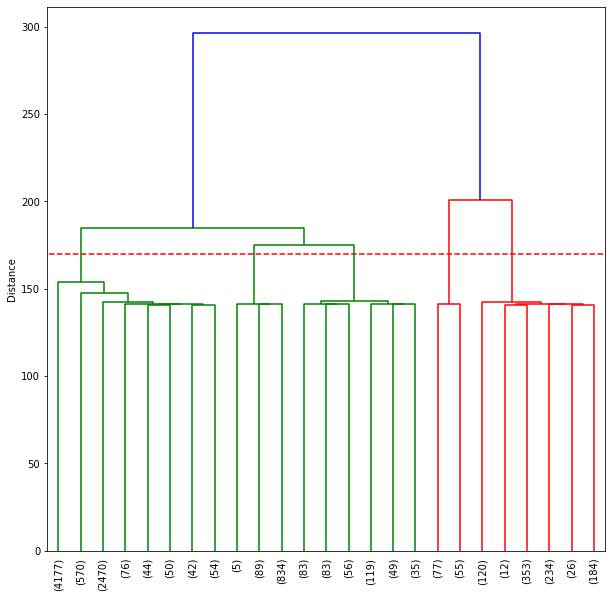

In [19]:
from matplotlib.pyplot import hlines

fig, axes = pyplot.subplots(1, 1, figsize=(10, 10))
hlines(y=170, color = 'r', xmin = -1000, xmax = 1000, linestyle = 'dashed')

plt=hca.dendrogram(link_matrix,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")


In [20]:
k=5
meteorite_cluster=fcluster(link_matrix, k, criterion='maxclust')

unique, counts = np.unique(meteorite_cluster, return_counts=True)
dict(zip(unique, counts))


{1: 7483, 2: 928, 3: 425, 4: 132, 5: 929}

In [21]:
meteorite_cluster_df = pd.DataFrame(meteorite_cluster, columns=['clusters'])
meteorites = pd.concat([meteorites, meteorite_cluster_df], axis=1)



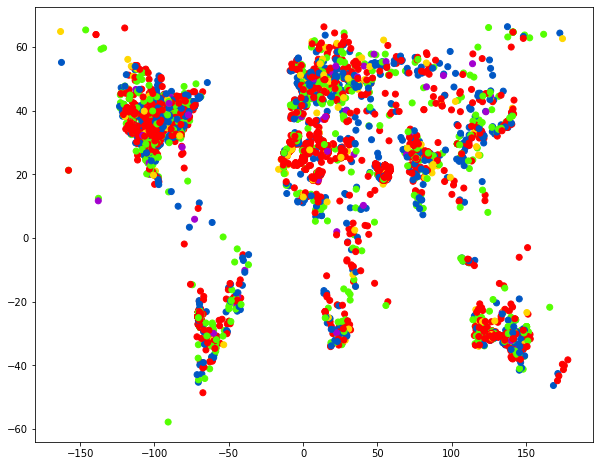

In [22]:
pyplot.figure(figsize=(10, 8))
pyplot.scatter(meteorites['longitude'], 
               meteorites['latitude'], 
               c=meteorites['clusters'], 
               cmap='prism')
pyplot.show()

In [23]:
cluster1 = meteorites[meteorites.clusters == 1]
cluster2 = meteorites[meteorites.clusters == 2]
cluster3 = meteorites[meteorites.clusters == 3]
cluster4 = meteorites[meteorites.clusters == 4]
cluster5 = meteorites[meteorites.clusters == 5]


In [24]:
clt = [cluster1, cluster2, cluster3, cluster4, cluster5]

In [25]:
chart = meteorites.groupby(['clusters']).mean()

chart['Dimensions'] = [size(cluster1),size(cluster2),size(cluster3),size(cluster4),size(cluster5)]

chart.round(0)


,mass,latitude,longitude,lc_sample,Dimensions
clusters,,,,,
1.0,35389.0,19.0,18.0,10.0,67347
2.0,166779.0,26.0,-8.0,6.0,8352
3.0,78896.0,22.0,22.0,9.0,3825
4.0,65988.0,24.0,11.0,9.0,1188
5.0,79853.0,24.0,-13.0,7.0,8361
